In [39]:
import sys
import os

In [40]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [41]:
#pip install seaborn


In [42]:
#pip install scipy


In [43]:
from scripts.utils import *

In [45]:
benin_data = convert_timestamp(benin_data)
print(f"Benin dataframe 'Timestamp' dtype: {benin_data['Timestamp'].dtype}")
benin_data.set_index('Timestamp', inplace=True)

Benin dataframe 'Timestamp' dtype: datetime64[ns]


### Summary statistics
datatype, mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.

In [46]:
print(benin_data.info())
print(benin_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


###  Check for Missing Values and Outliers
Look for missing values, outliers, or incorrect entries(negative values)

In [47]:
data_check({'Benin': benin_data})


Data Quality Check for Benin:
Missing Values: 525600
Comments    525600
dtype: int64

Negative values in GHI:
Number of negative values: 258847

Outliers in GHI:
Number of outliers: 145
Percentage of outliers: 0.03%

Negative values in DNI:
Number of negative values: 275987

Outliers in DNI:
Number of outliers: 15196
Percentage of outliers: 2.89%

Negative values in DHI:
Number of negative values: 259182

Outliers in DHI:
Number of outliers: 8733
Percentage of outliers: 1.66%

Outliers in ModA:
Number of outliers: 98
Percentage of outliers: 0.02%

Outliers in ModB:
Number of outliers: 240
Percentage of outliers: 0.05%

Outliers in Tamb:
Number of outliers: 222
Percentage of outliers: 0.04%

Outliers in WS:
Number of outliers: 6717
Percentage of outliers: 1.28%

Outliers in WSgust:
Number of outliers: 5368
Percentage of outliers: 1.02%

Outliers in WSstdev:
Number of outliers: 107372
Percentage of outliers: 20.43%

Outliers in WDstdev:
Number of outliers: 7251
Percentage of outliers: 1

### Handle the negative values in GHI, DNI and DHI

In [48]:
benin_data = handle_negative_values(dfs['Benin'], 'Benin')


Handling negative values for Benin:
  Found 258847 negative values in GHI
  Replaced negative values with 0 in GHI
  Found 275987 negative values in DNI
  Replaced negative values with 0 in DNI
  Found 259182 negative values in DHI
  Replaced negative values with 0 in DHI


### Time Series Analysis for 'GHI', 'DNI', 'DHI', and 'Tamb'
multivariate - time series to observe patterns by month, trends throughout day, or anomalies

d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\scripts\utils.py:106: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


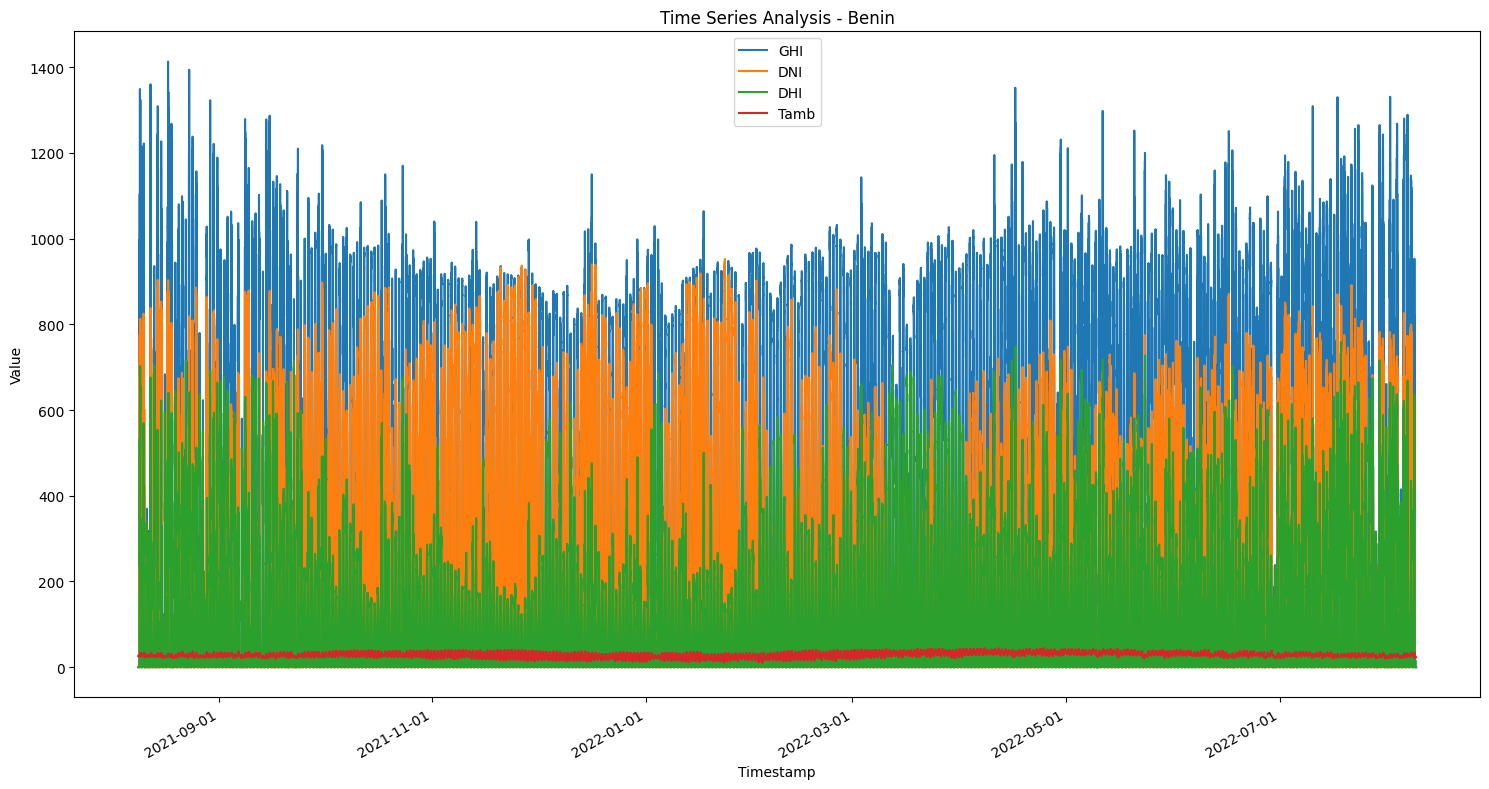

In [49]:
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']


time_series({'Benin': benin_data}, columns_to_plot)

### Time Series Analysis for 'Cleaning', 'ModA', 'ModB'
multivariate - evaluate the impact of cleaning (using the 'Cleaning' column)

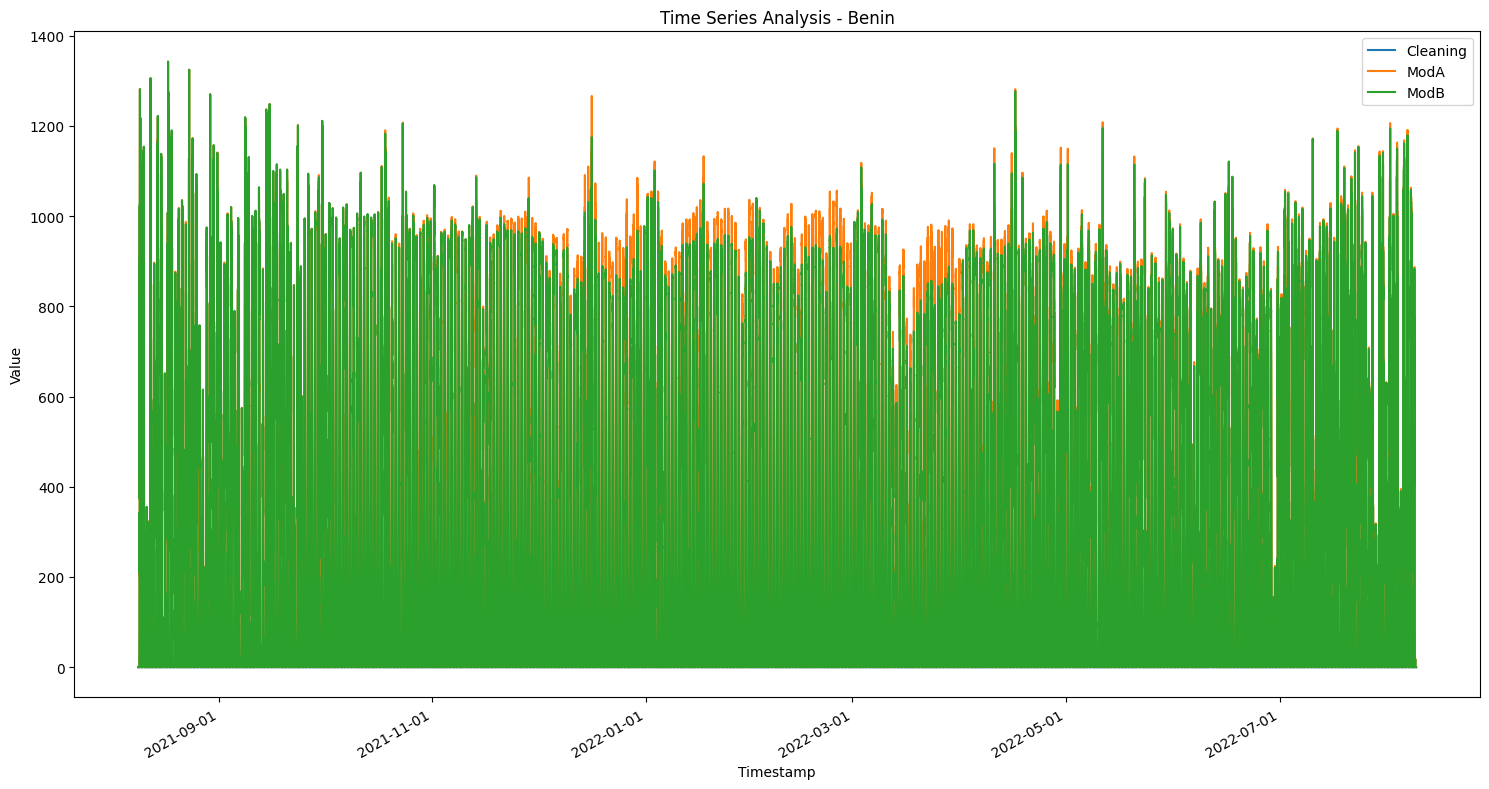

In [50]:
columns_to_plot = ['Cleaning', 'ModA', 'ModB']
plot_time_series_combined({'Benin': benin_data}, columns_to_plot)

### Correlation Analysis
correlations between solar radiation components (GHI, DNI, DHI) and temperature measures

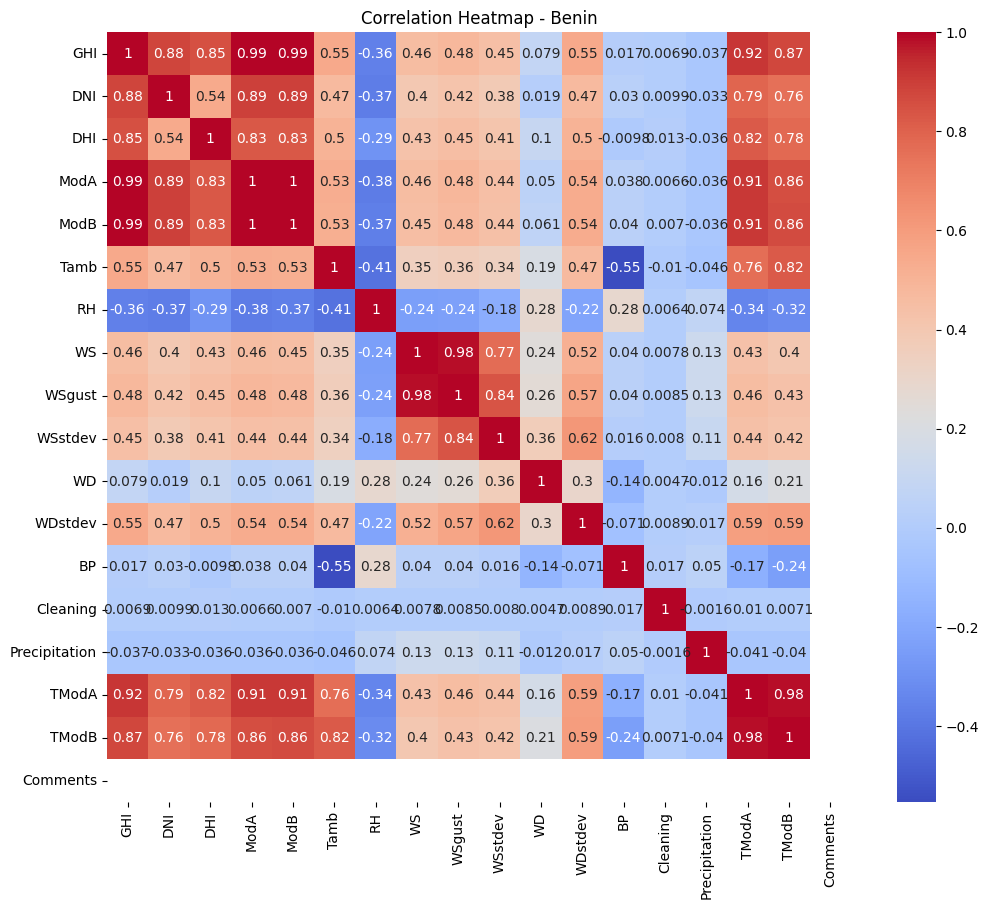

In [51]:
plot_correlation_heatmap(benin_data, 'Benin')

### Wind Analysis 
distribution of wind speed and direction

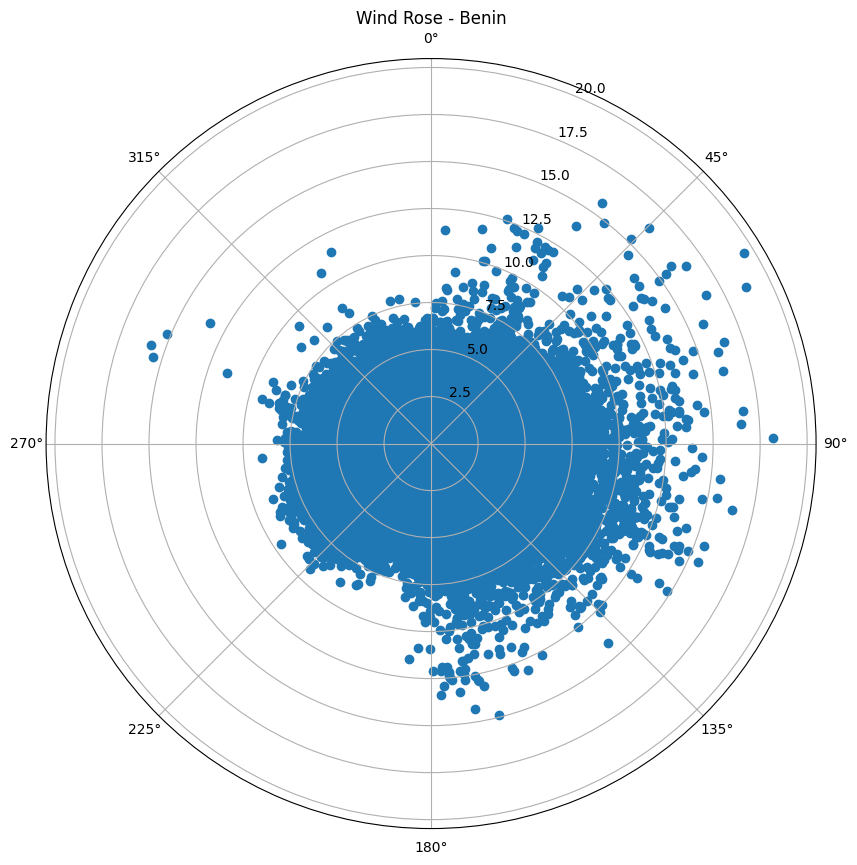

In [52]:
plot_wind_rose(benin_data, 'Benin')

### Histogram 
histograms to visualize the frequency distribution of variables GHI, DNI, DHI, WS, and Tamb

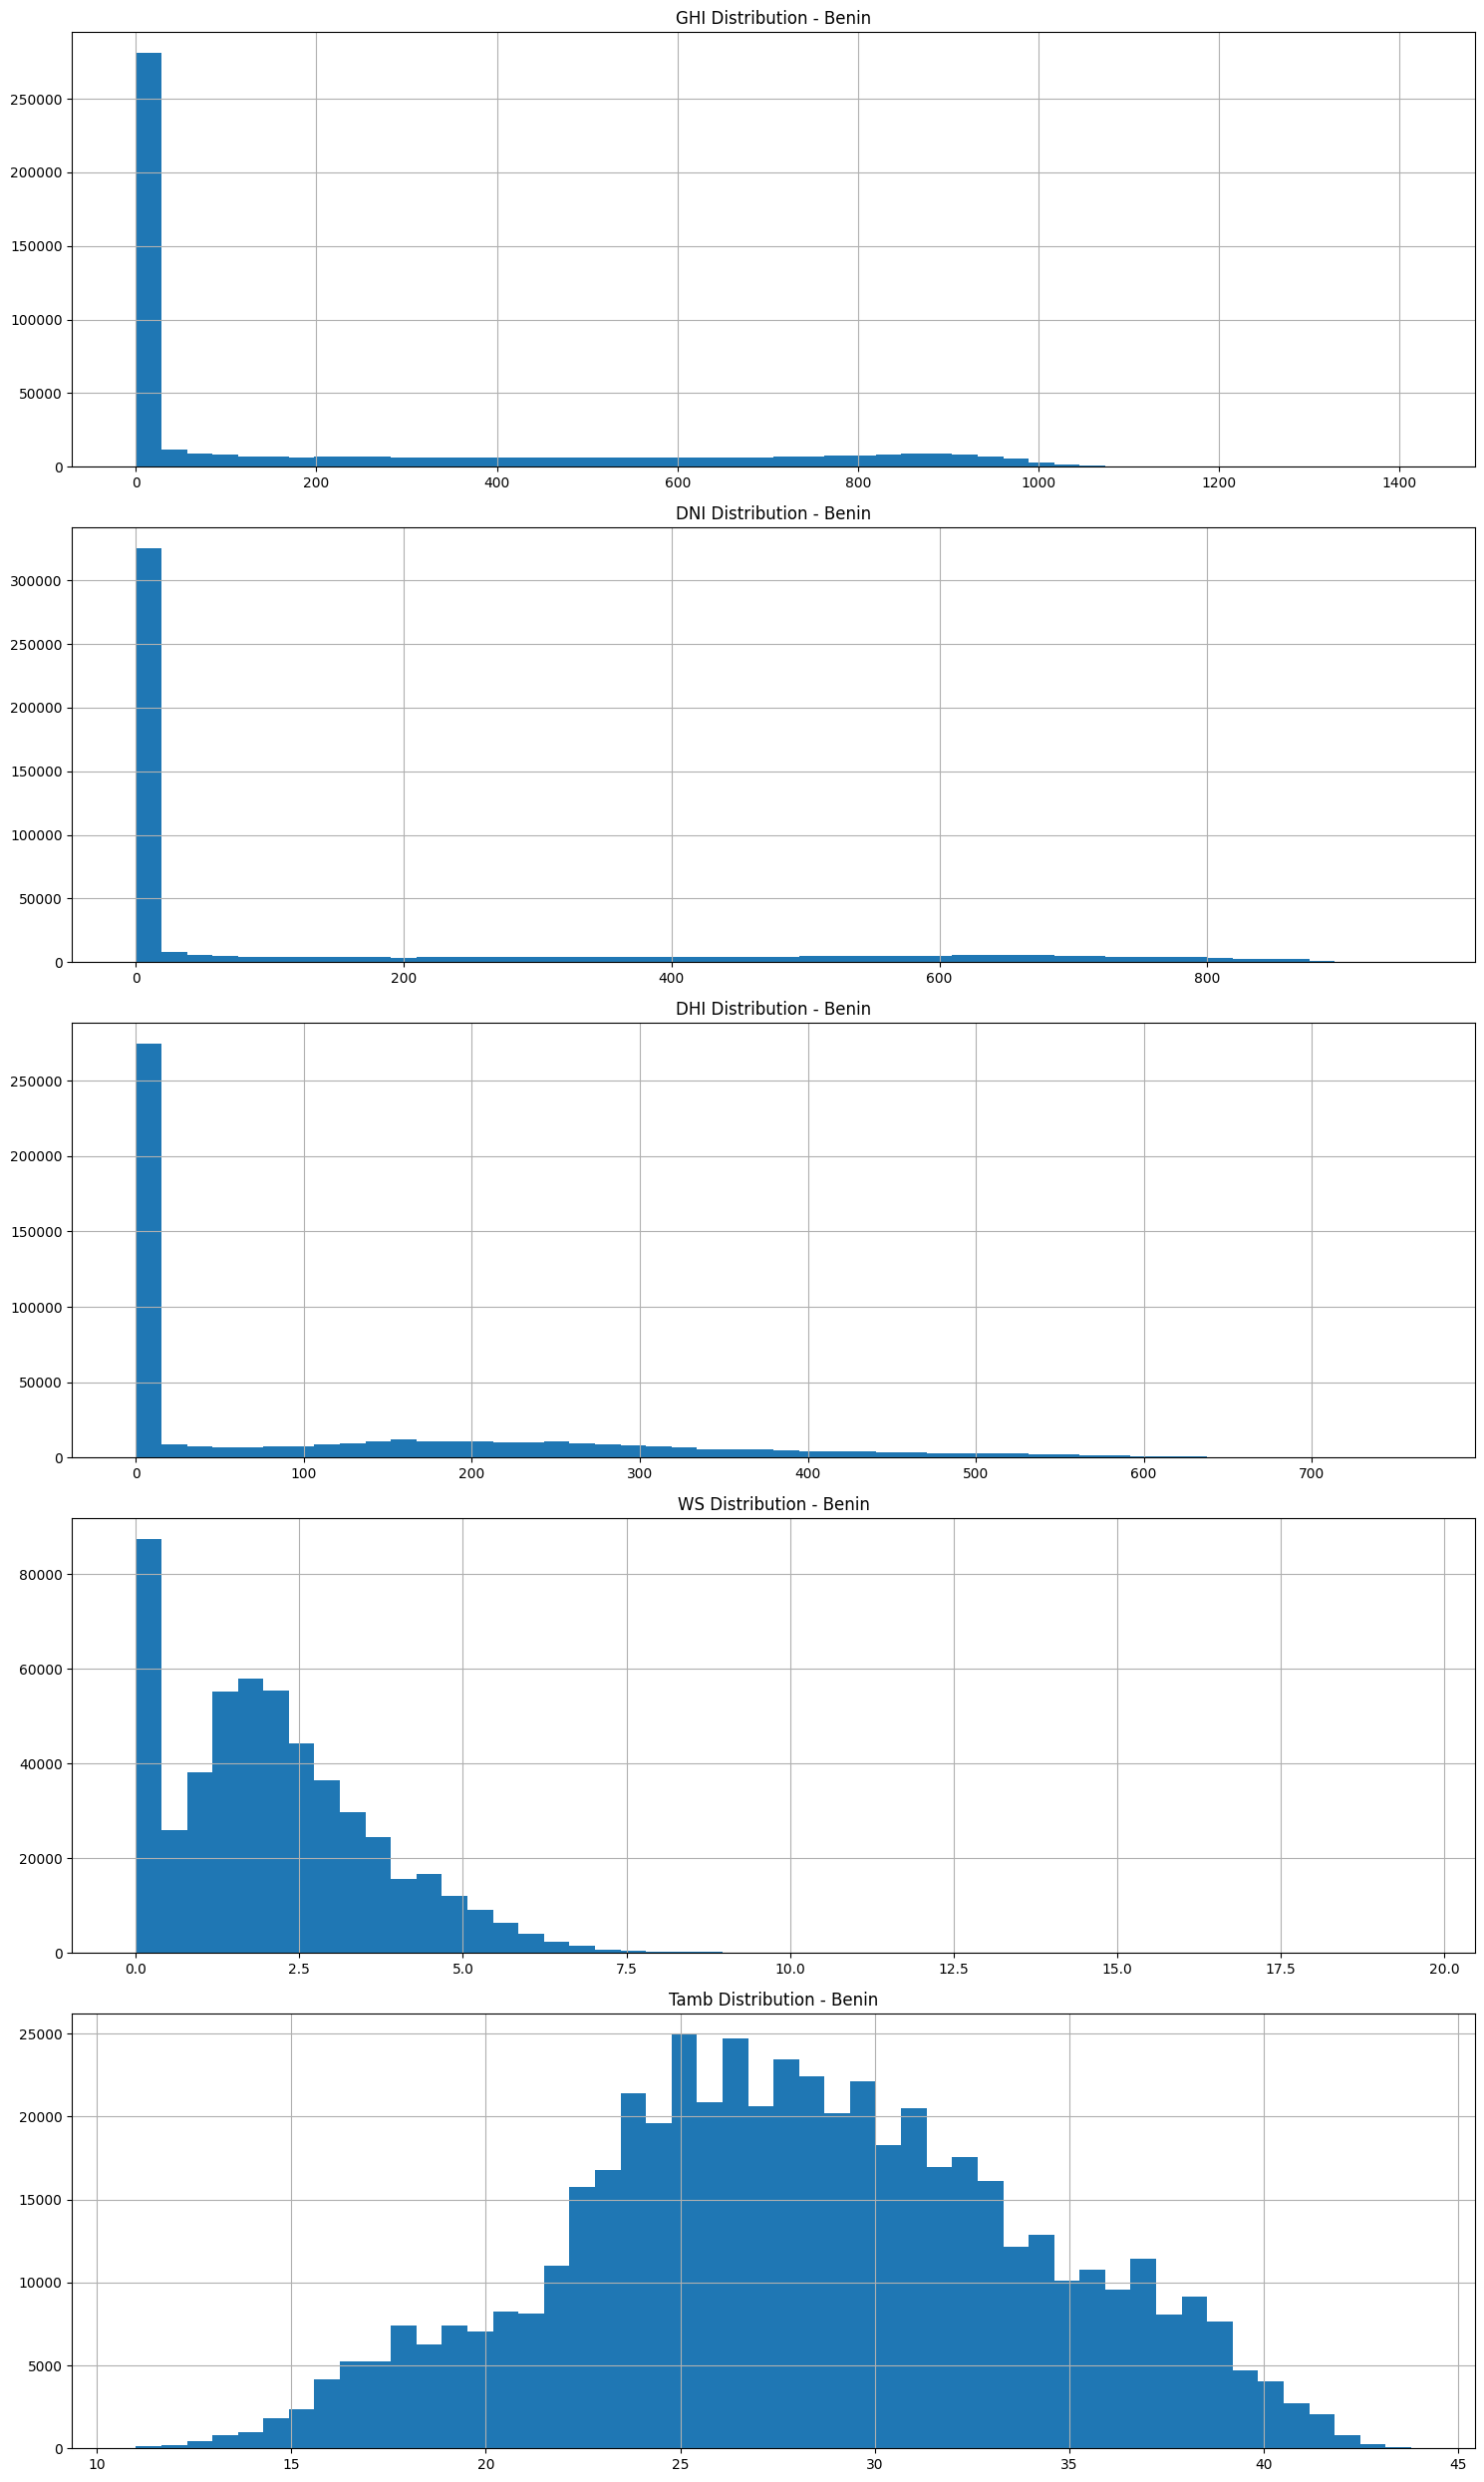

In [53]:
plot_histograms(benin_data, ['GHI', 'DNI', 'DHI', 'WS', 'Tamb'], 'Benin')

### Z Score Analysis 
Z-scores to flag outliers with z-threshold of 3


Outliers for Benin (|z-score| > 3):
GHI                90
DNI                 2
DHI              3889
ModA               27
ModB               63
Tamb                0
RH                  0
WS               3109
WSgust           3500
WSstdev          5653
WD                  0
WDstdev          4765
BP                865
Cleaning          485
Precipitation    1402
TModA              10
TModB              98
Comments            0
dtype: int64


d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\scripts\utils.py:195: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


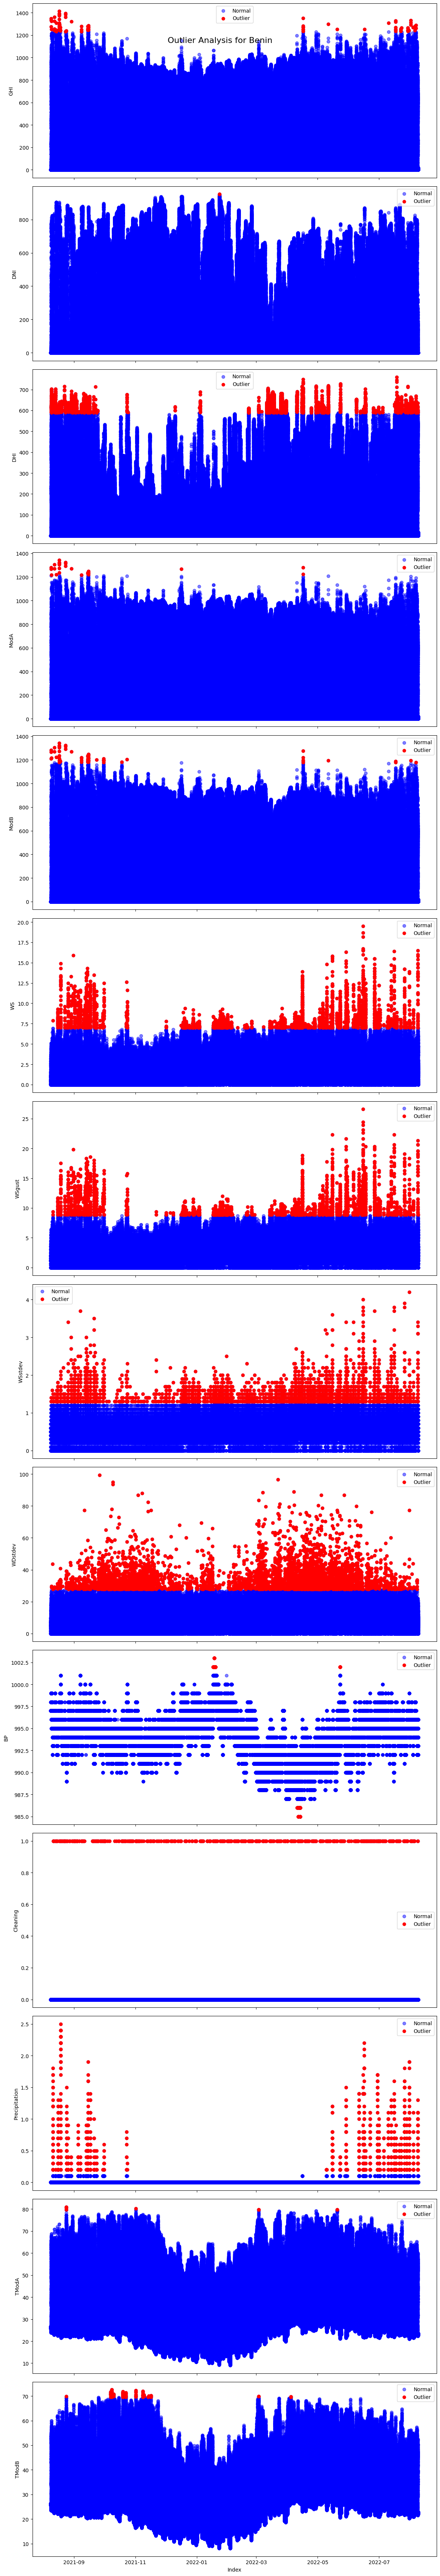

In [54]:
analyze_and_plot_outliers(benin_data, 'Benin')

### Bubble charts 
explore complex relationships between variables, such as GHI vs. Tamb vs. 

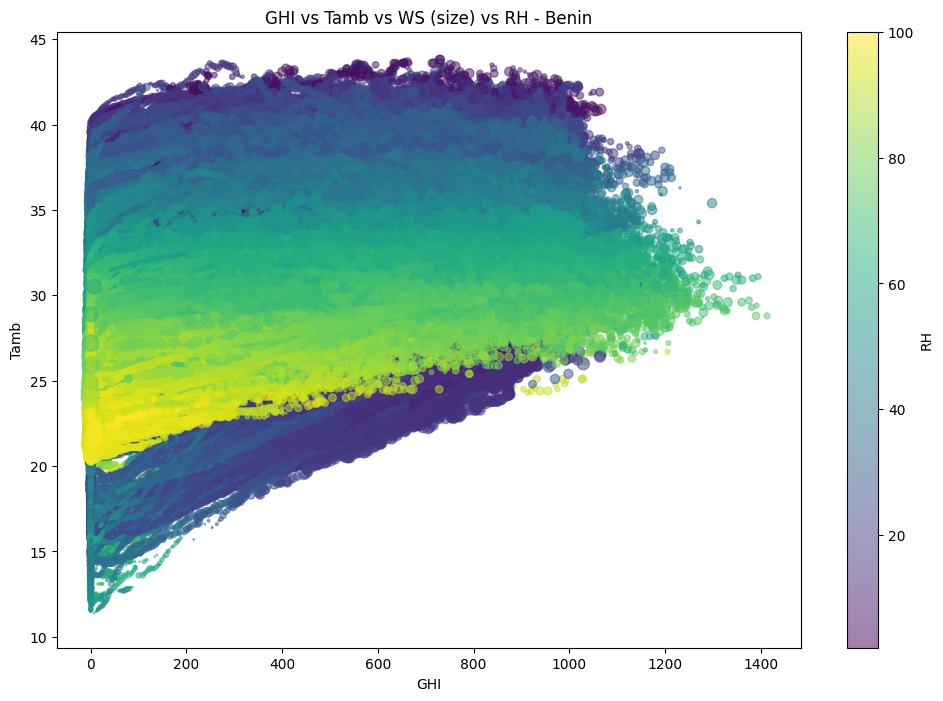

In [55]:
plot_bubble_chart(benin_data, 'Benin')

### Temperature Analysis
Examine how relative humidity (RH) might influence temperature readings and solar radiation


Analyzing humidity impact for Benin


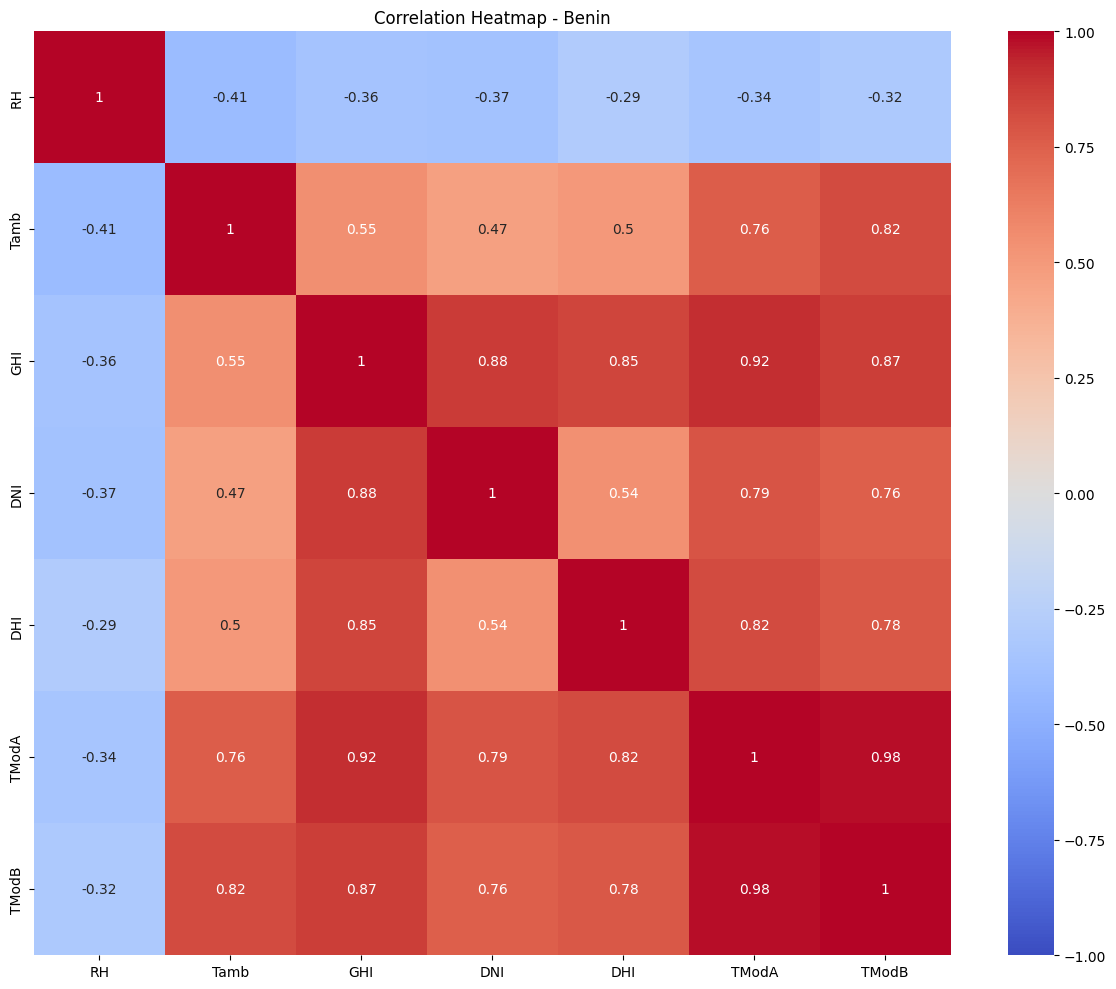

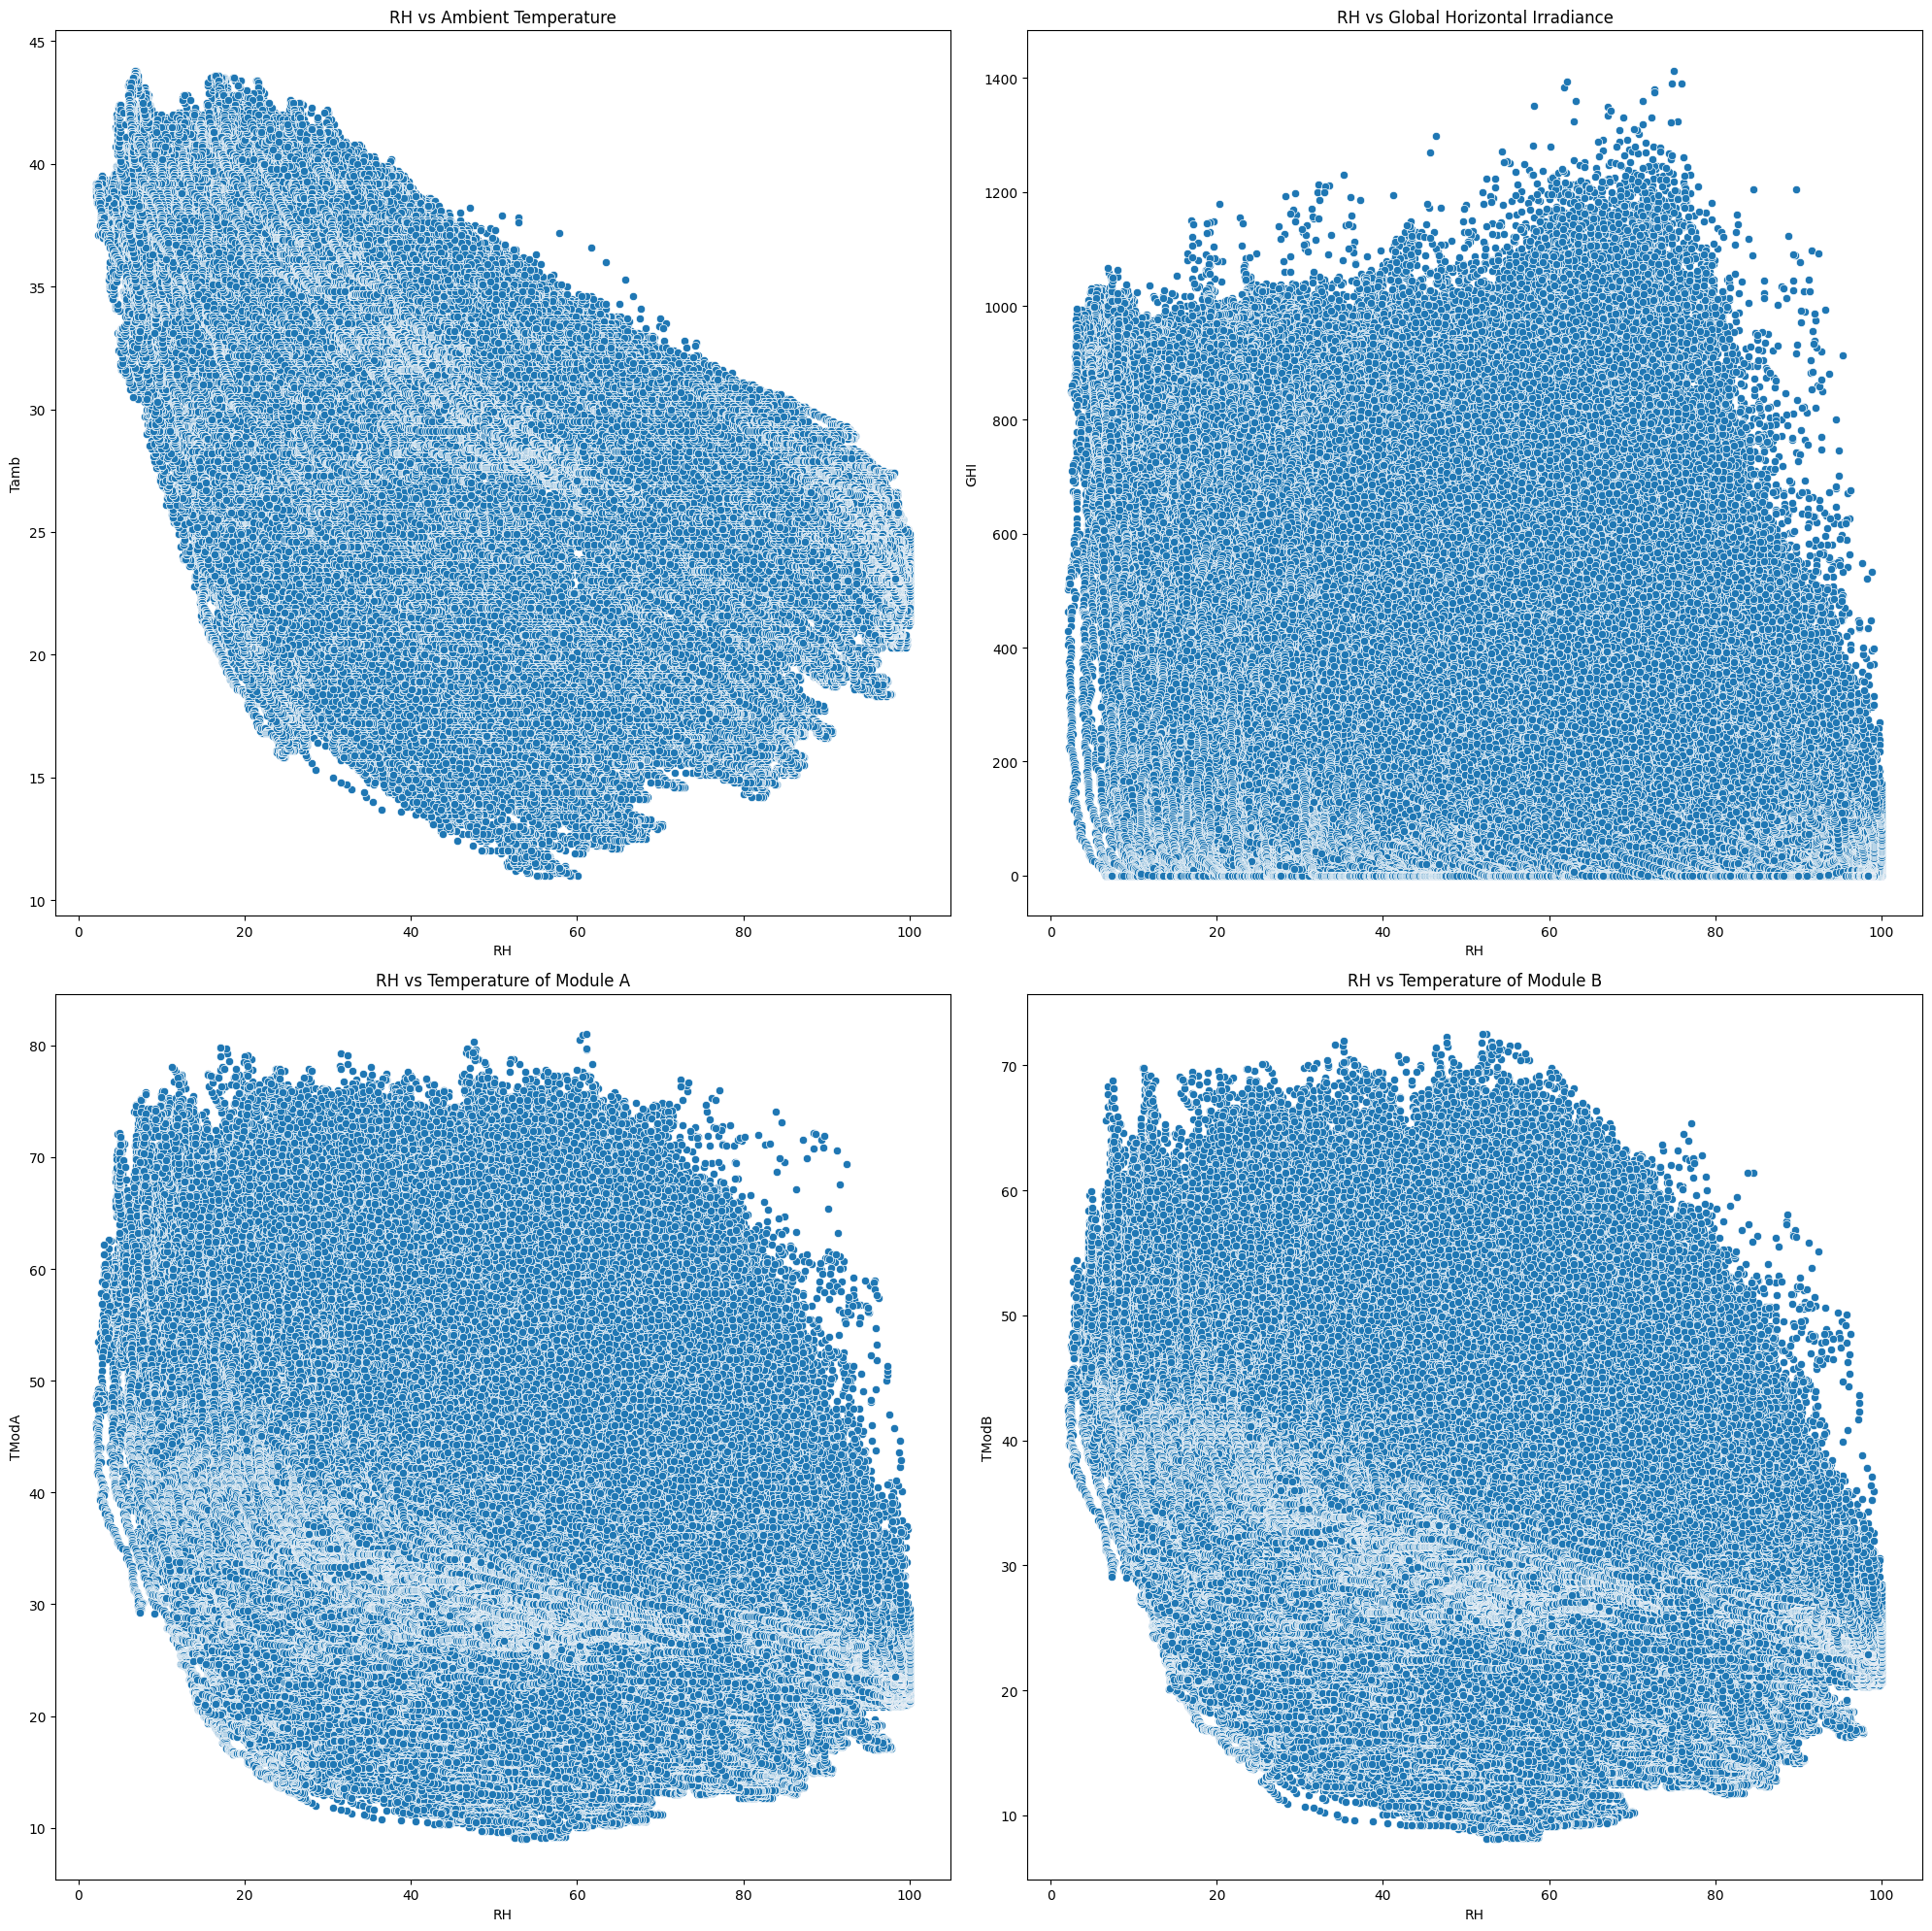

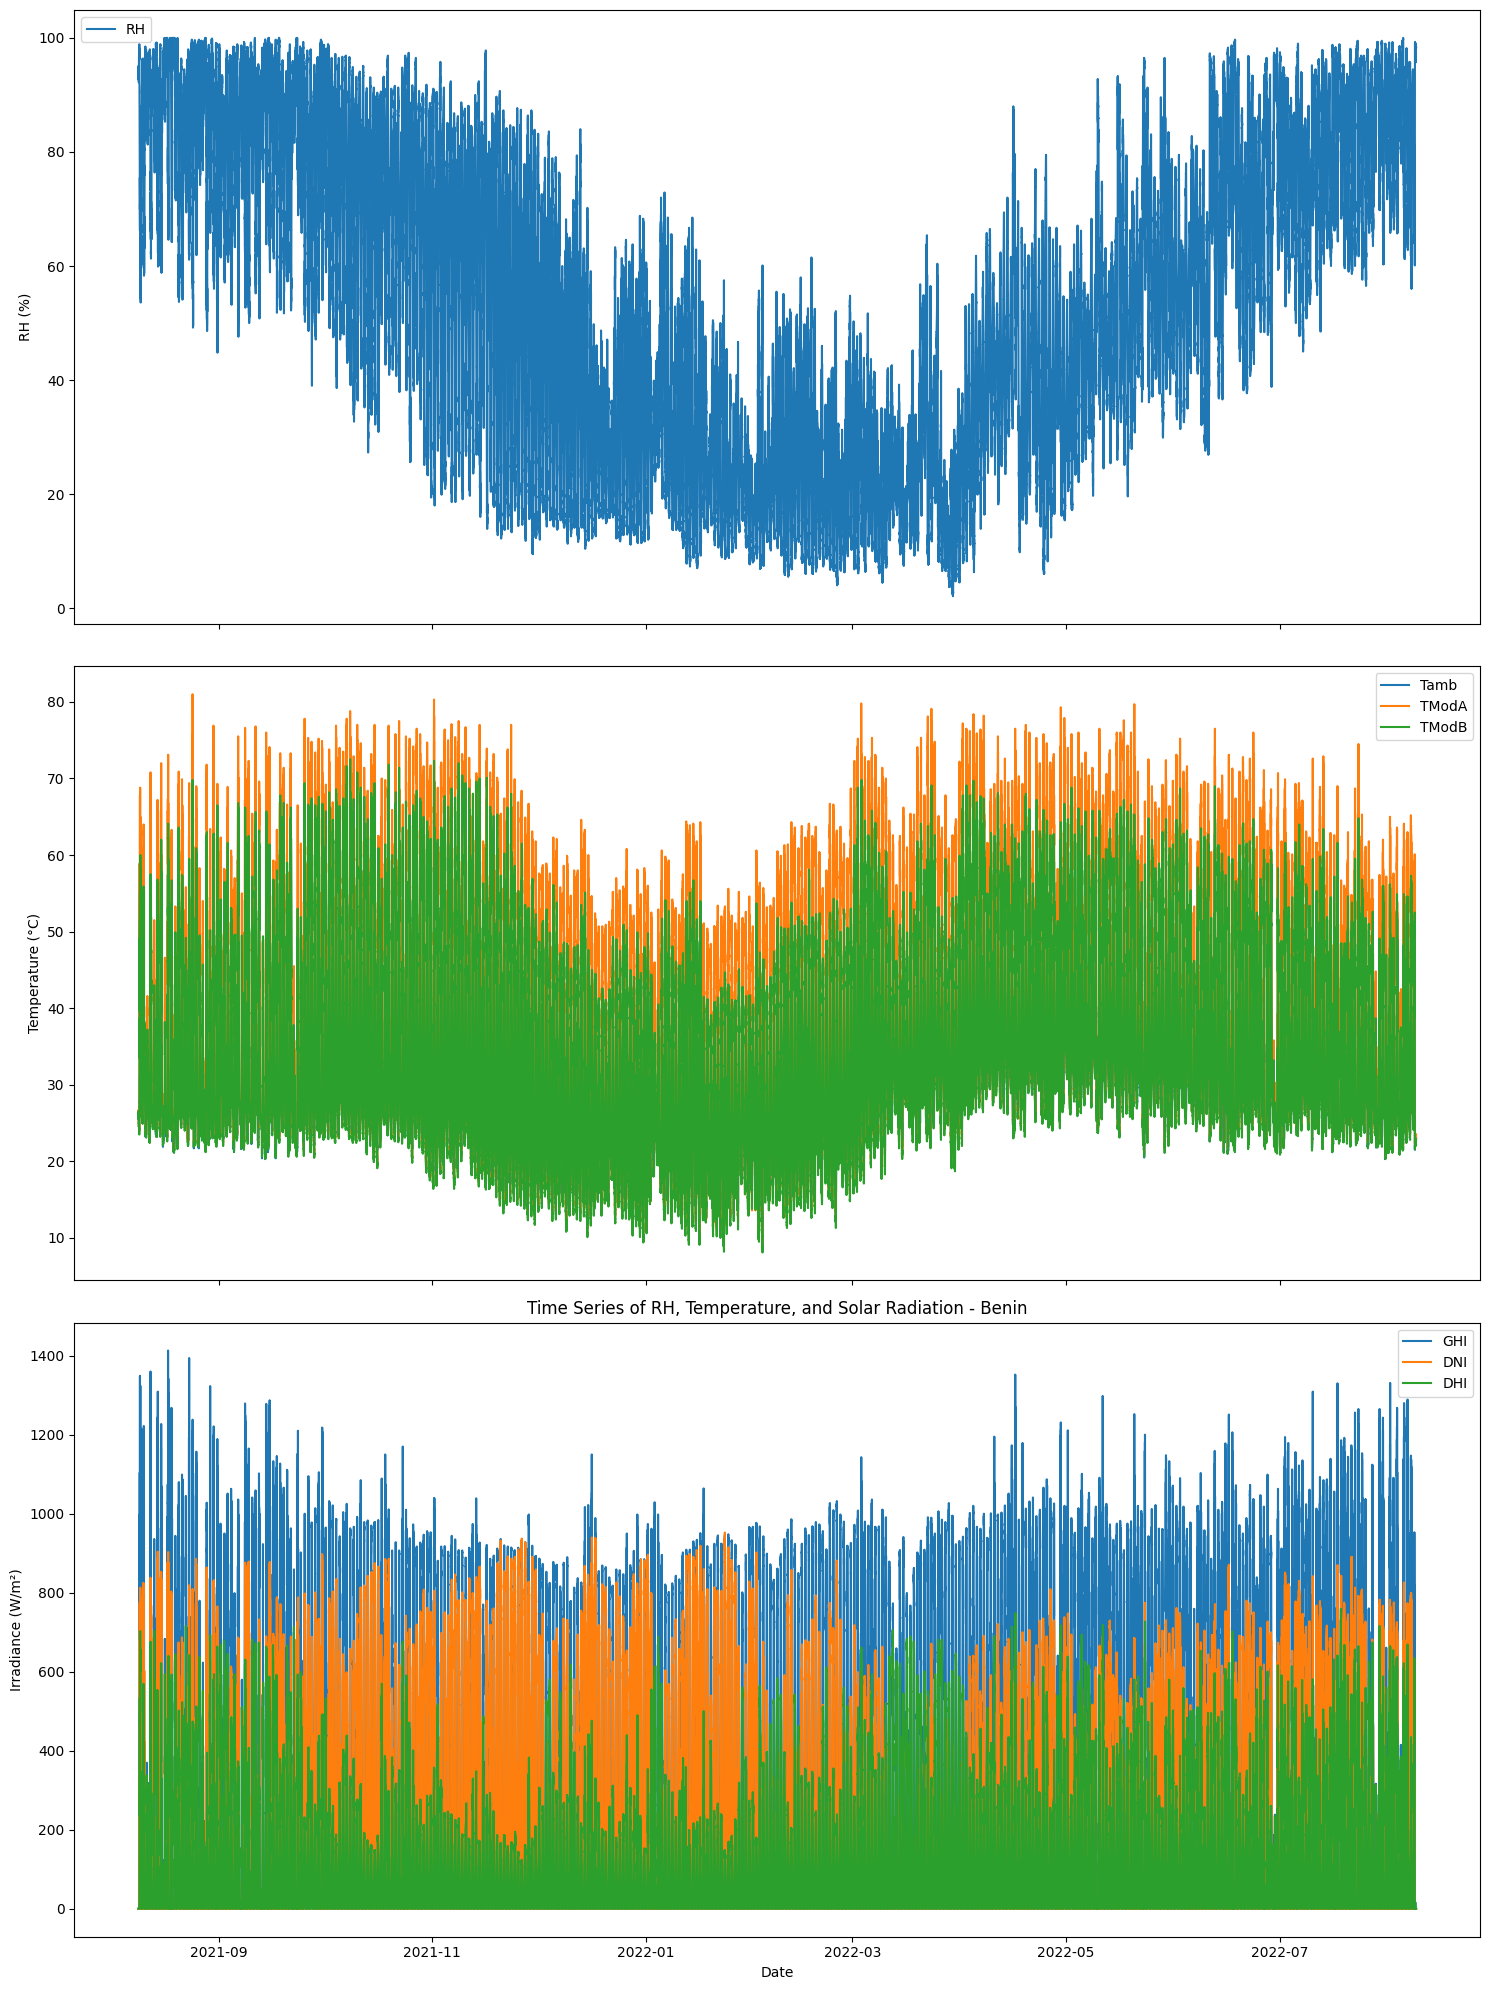

d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\scripts\utils.py:272: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RH_bins')['Tamb'].mean().plot(kind='bar', ax=axes[0, 0])
d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\scripts\utils.py:277: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RH_bins')['GHI'].mean().plot(kind='bar', ax=axes[0, 1])
d:\KIFIYA AIM\WEEK 0\MoonLight-Energy-Solutions-\scripts\utils.py:282: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observ

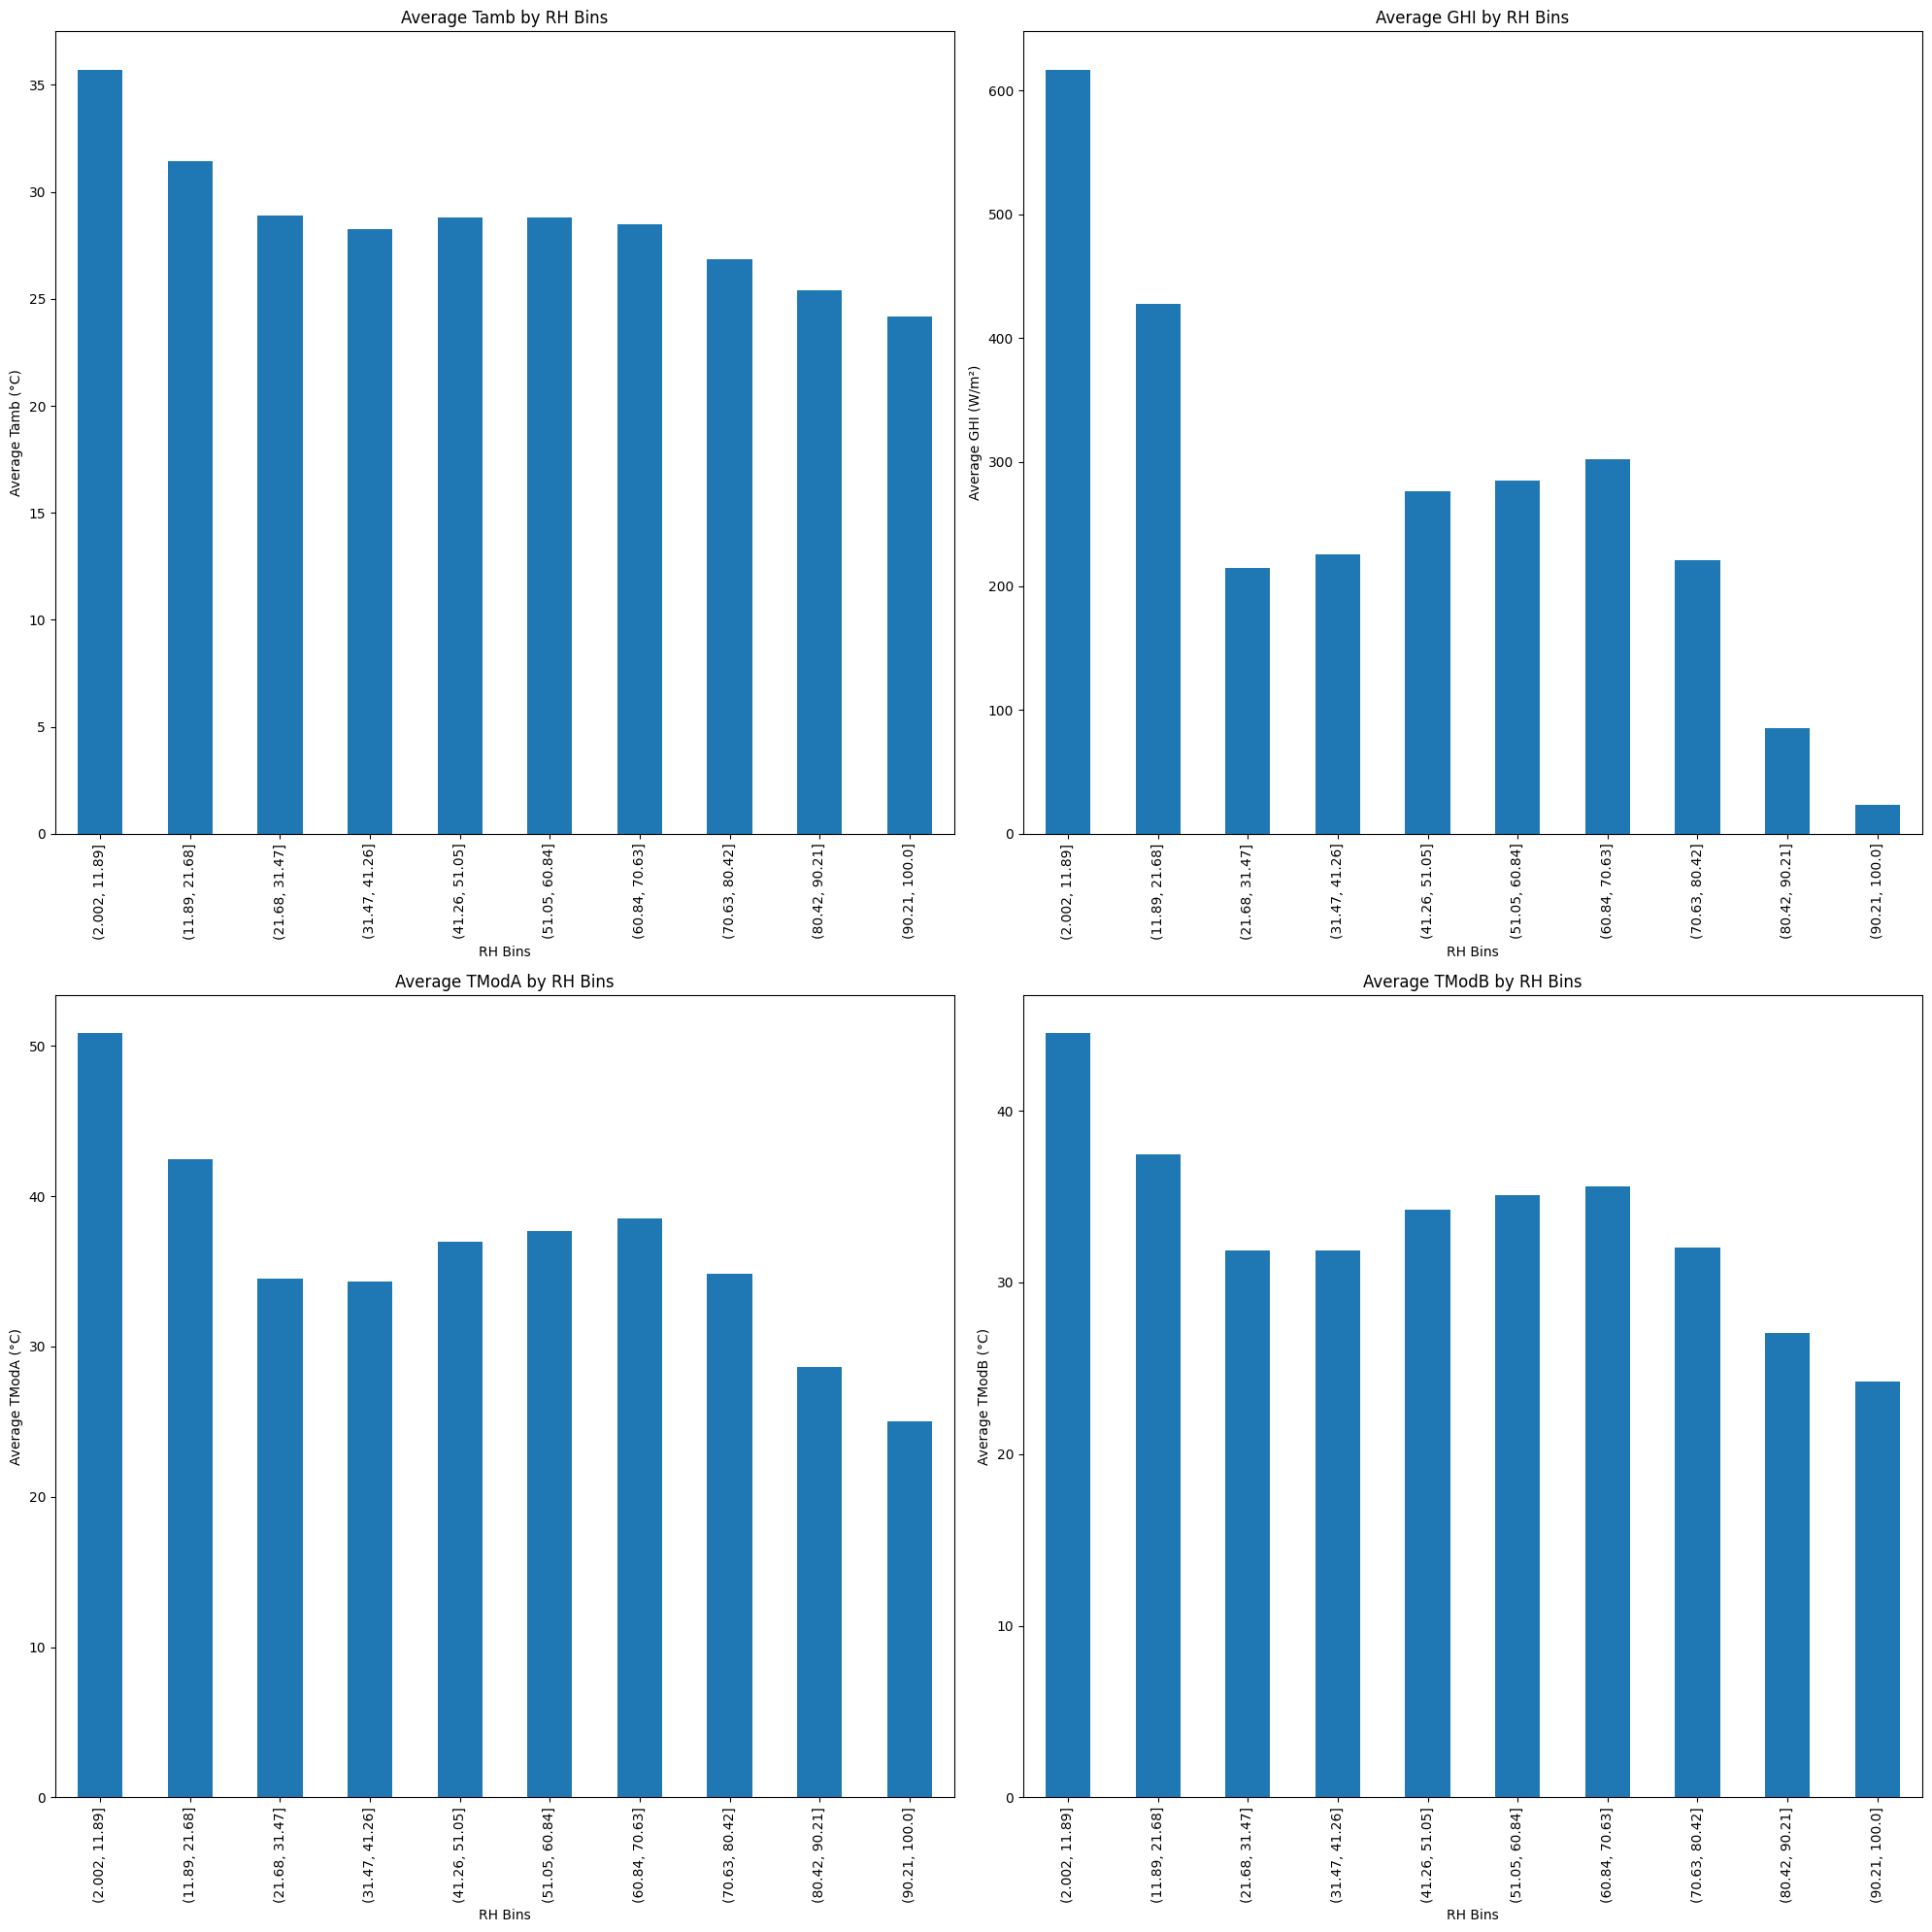

In [56]:
analyze_humidity_impact({'Benin': benin_data})

### drop 'Comments'

In [57]:
cleaned_benin = clean_data({'Benin': dfs['Benin']})
print("\nCleaned dataset for Benin:")
print(cleaned_benin['Benin'].info())
dfs['Benin'] = cleaned_benin['Benin']

Removed 'Comments' column from Benin dataset.

No missing values remain in Benin dataset.

Cleaned dataset for Benin:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   GHI            525600 non-null  float64 
 1   DNI            525600 non-null  float64 
 2   DHI            525600 non-null  float64 
 3   ModA           525600 non-null  float64 
 4   ModB           525600 non-null  float64 
 5   Tamb           525600 non-null  float64 
 6   RH             525600 non-null  float64 
 7   WS             525600 non-null  float64 
 8   WSgust         525600 non-null  float64 
 9   WSstdev        525600 non-null  float64 
 10  WD             525600 non-null  float64 
 11  WDstdev        525600 non-null  float64 
 12  BP             525600 non-null  int64   
 13  Cleaning       525600 non-null  int64   
 